# Ratail Store Inventory and Demand Forecasting Analysis

<b><h2>About Dataset</b></h2>

This dataset follows the format of the Retail Store Inventory Forecasting Dataset and corrects mislabeled entries such as store and product IDs. Additionally, it includes an Epidemic feature to simulate retail conditions during the COVID-19 pandemic period, enhancing the realism and practical value of the data. These improvements are aimed at making the dataset more suitable for time series forecasting tasks.


This notebook explores the fascinating interplay between retail inventory data and demand forecasting. Our approach is thorough, combining data cleaning, exploratory analysis, data visualization, and predictive modeling.


##### Table of Contents
   1. Imports and Setup
   2. Data Loading
   3. Data Cleaning and Preprocessing
   4. Exploratory Data Analysis
   5. Data Visualization
   6. Demand Prediction
   7. Conclusion

In [3]:
# Import and Setup

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [102]:
# Potential Models used

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 30 Retail Store Inventory and Demand Forecasting\sales_data.csv")

df.head(9)

Date Store_ID Product_ID     Category Region  Inventory_Level  \
0  1/1/2022     S001      P0001  Electronics  North              195   
1  1/1/2022     S001      P0002     Clothing  North              117   
2  1/1/2022     S001      P0003     Clothing  North              247   
3  1/1/2022     S001      P0004  Electronics  North              139   
4  1/1/2022     S001      P0005    Groceries  North              152   
5  1/1/2022     S001      P0006         Toys  North              209   
6  1/1/2022     S001      P0007    Groceries  North              118   
7  1/1/2022     S001      P0008  Electronics  North              244   
8  1/1/2022     S001      P0009     Clothing  North              115   

   Units_Sold  Units_Ordered  Price  Revenue  Discount Weather Promotion  \
0         102            252  72.72  7417.44         5   Snowy        No   
1         117            249  80.16  9378.72        15   Snowy       Yes   
2         114            612  62.94  7175.16        10   Snowy       Yes   
3          45            102  87.63  3943.35        10   Snowy        No   
4          65            271  54.41  3536.65         0   Snowy        No   
5          60              0  35.53  2131.80         0   Snowy        No   
6          81            335  23.27  1884.87         5   Snowy        No   
7          42              0  37.79  1587.18         5   Snowy        No   
8          88            139  94.20  8289.60         5   Snowy        No   

   Competitor_Pricing Seasonality Epidemic  Demand  
0               85.73      Winter       No     115  
1               92.02      Winter       No     229  
2               60.08      Winter       No     157  
3               85.19      Winter       No      52  
4               51.63      Winter       No      59  
5               40.01      Winter       No      55  
6               24.78      Winter       No      94  
7               44.85      Winter       No      61  
8              108.70      Winter       No     129

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                76000 non-null  datetime64[ns]
 1   Store_ID            76000 non-null  object        
 2   Product_ID          76000 non-null  object        
 3   Category            76000 non-null  object        
 4   Region              76000 non-null  object        
 5   Inventory_Level     76000 non-null  int64         
 6   Units_Sold          76000 non-null  int64         
 7   Units_Ordered       76000 non-null  int64         
 8   Price               76000 non-null  float64       
 9   Revenue             76000 non-null  float64       
 10  Discount            76000 non-null  int64         
 11  Weather             76000 non-null  object        
 12  Promotion           76000 non-null  int64         
 13  Competitor_Pricing  76000 non-null  float64   

In [5]:
df.shape

(76000, 17)

In [6]:
df.isnull().sum()

Date                  0
Store_ID              0
Product_ID            0
Category              0
Region                0
Inventory_Level       0
Units_Sold            0
Units_Ordered         0
Price                 0
Revenue               0
Discount              0
Weather               0
Promotion             0
Competitor_Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [32]:
df.describe()

Date  Inventory_Level    Units_Sold  Units_Ordered  \
count                76000     76000.000000  76000.000000   76000.000000   
mean   2023-01-15 12:00:00       301.062842     88.827316      89.090645   
min    2022-01-01 00:00:00         0.000000      0.000000       0.000000   
25%    2022-07-09 18:00:00       136.000000     58.000000       0.000000   
50%    2023-01-15 12:00:00       227.000000     84.000000       0.000000   
75%    2023-07-24 06:00:00       408.000000    114.000000     121.000000   
max    2024-01-30 00:00:00      2267.000000    426.000000    1616.000000   
std                    NaN       226.510161     43.994525     162.404627   

              Price       Revenue      Discount     Promotion  \
count  76000.000000  76000.000000  76000.000000  76000.000000   
mean      67.726028   5990.790717      9.087039      0.328947   
min        4.740000      0.000000      0.000000      0.000000   
25%       31.997500   2426.595000      5.000000      0.000000   
50%       64.500000   4789.285000     10.000000      0.000000   
75%       95.830000   8349.327500     10.000000      1.000000   
max      228.030000  69859.740000     25.000000      1.000000   
std       39.377899   4756.214481      7.475781      0.469834   

       Competitor_Pricing      Epidemic        Demand  
count        76000.000000  76000.000000  76000.000000  
mean            69.454029      0.200000    104.317158  
min              4.290000      0.000000      4.000000  
25%             32.620000      0.000000     71.000000  
50%             65.700000      0.000000    100.000000  
75%             97.932500      0.000000    133.000000  
max            261.220000      1.000000    430.000000  
std             40.943818      0.400003     46.964801

In [79]:
df.describe(include=['object'])

Store_ID Product_ID   Category Region Weather Seasonality
count     76000      76000      76000  76000   76000       76000
unique        5         20          5      4       4           4
top        S001      P0001  Groceries  North  Cloudy      Winter
freq      15200       3800      30400  30400   24360       21000

In [66]:
# List of categorical columns to group by
categorical_cols = ['Category', 'Store_ID', 'Region','Seasonality','Weather'] 

#  revenue
df['Revenue'] = df['Price'] * df['Units_Sold']


for col in categorical_cols:
    revenue_by_cat = df.groupby(col)['Revenue'].sum().reset_index()
    print(f"\nTotal Revenue grouped by {col}:")
    print(revenue_by_cat)


Total Revenue grouped by Category:
      Category       Revenue
0     Clothing  8.520061e+07
1  Electronics  6.603987e+07
2    Furniture  1.112836e+08
3    Groceries  1.688645e+08
4         Toys  2.391155e+07

Total Revenue grouped by Store_ID:
  Store_ID      Revenue
0     S001  89854451.03
1     S002  92298840.07
2     S003  98526308.33
3     S004  94466923.20
4     S005  80153571.87

Total Revenue grouped by Region:
  Region       Revenue
0   East  9.852631e+07
1  North  1.700080e+08
2  South  9.229884e+07
3   West  9.446692e+07

Total Revenue grouped by Seasonality:
  Seasonality       Revenue
0      Autumn  1.082626e+08
1      Spring  1.008363e+08
2      Summer  1.207869e+08
3      Winter  1.254143e+08

Total Revenue grouped by Weather:
  Weather       Revenue
0  Cloudy  1.471902e+08
1   Rainy  9.249102e+07
2   Snowy  5.932902e+07
3   Sunny  1.562899e+08


## Data Cleaning and Preprocessing

In [9]:
# Convert the 'Date' column to datetime

df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76000 entries, 0 to 75999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
76000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 593.9 KB


In [28]:
df['Epidemic'] = df['Epidemic'].replace('No', 0)
df['Epidemic'] = df['Epidemic'].replace('Yes',1)
df['Epidemic'].value_counts()

Epidemic
0    60800
1    15200
Name: count, dtype: int64

In [29]:
df['Promotion'] = df['Promotion'].replace('No', 0)
df['Promotion'] = df['Promotion'].replace('Yes',1)
df['Promotion'].value_counts()

Promotion
0    51000
1    25000
Name: count, dtype: int64

In [34]:
numerical_cols = df.select_dtypes(include =['int64','float64']).columns
categoricals_cols =df.select_dtypes(include = ['object']).columns

In [31]:
df.head(8)

Date Store_ID Product_ID     Category Region  Inventory_Level  \
0 2022-01-01     S001      P0001  Electronics  North              195   
1 2022-01-01     S001      P0002     Clothing  North              117   
2 2022-01-01     S001      P0003     Clothing  North              247   
3 2022-01-01     S001      P0004  Electronics  North              139   
4 2022-01-01     S001      P0005    Groceries  North              152   
5 2022-01-01     S001      P0006         Toys  North              209   
6 2022-01-01     S001      P0007    Groceries  North              118   
7 2022-01-01     S001      P0008  Electronics  North              244   

   Units_Sold  Units_Ordered  Price  Revenue  Discount Weather  Promotion  \
0         102            252  72.72  7417.44         5   Snowy          0   
1         117            249  80.16  9378.72        15   Snowy          1   
2         114            612  62.94  7175.16        10   Snowy          1   
3          45            102  87.63  3943.35        10   Snowy          0   
4          65            271  54.41  3536.65         0   Snowy          0   
5          60              0  35.53  2131.80         0   Snowy          0   
6          81            335  23.27  1884.87         5   Snowy          0   
7          42              0  37.79  1587.18         5   Snowy          0   

   Competitor_Pricing Seasonality  Epidemic  Demand  
0               85.73      Winter         0     115  
1               92.02      Winter         0     229  
2               60.08      Winter         0     157  
3               85.19      Winter         0      52  
4               51.63      Winter         0      59  
5               40.01      Winter         0      55  
6               24.78      Winter         0      94  
7               44.85      Winter         0      61

## Exploratory Data Analysis

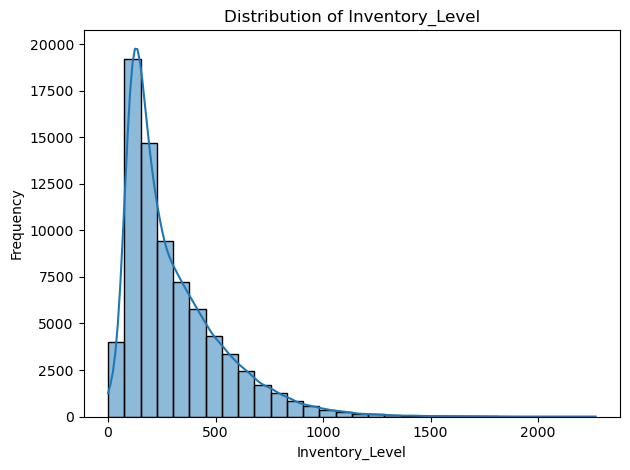

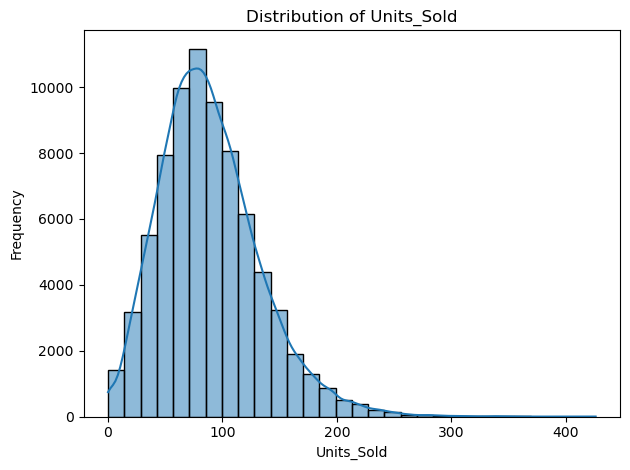

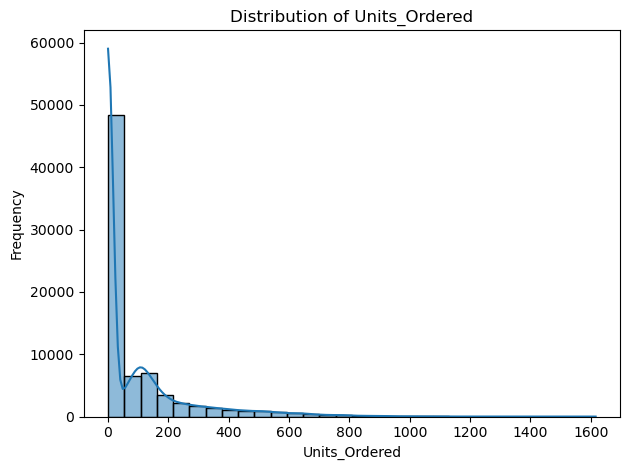

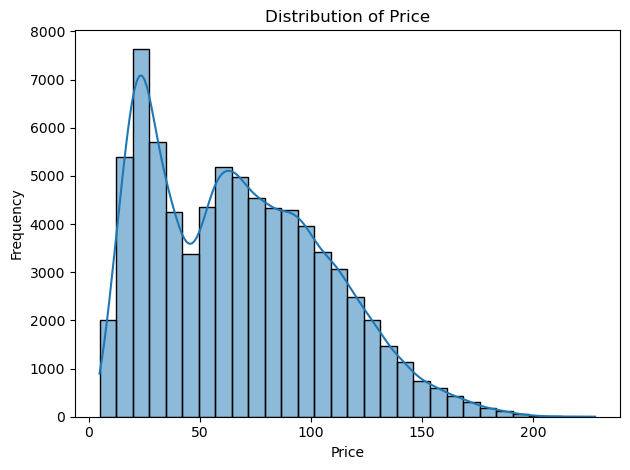

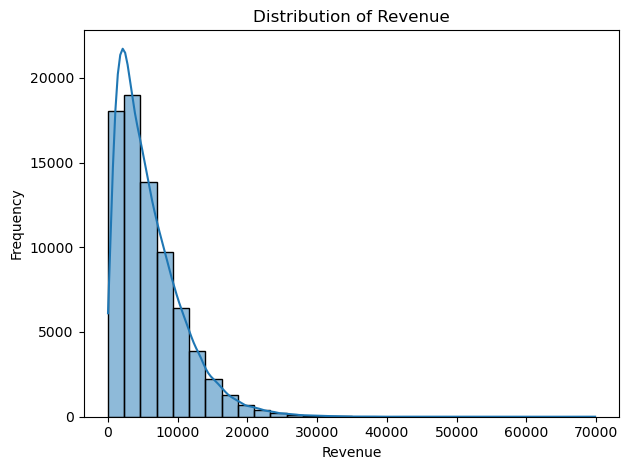

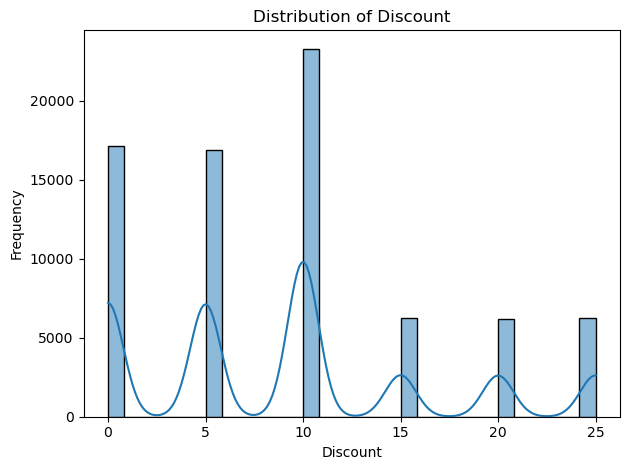

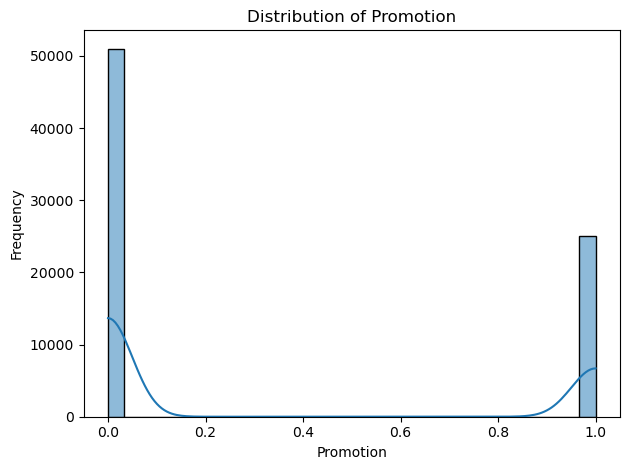

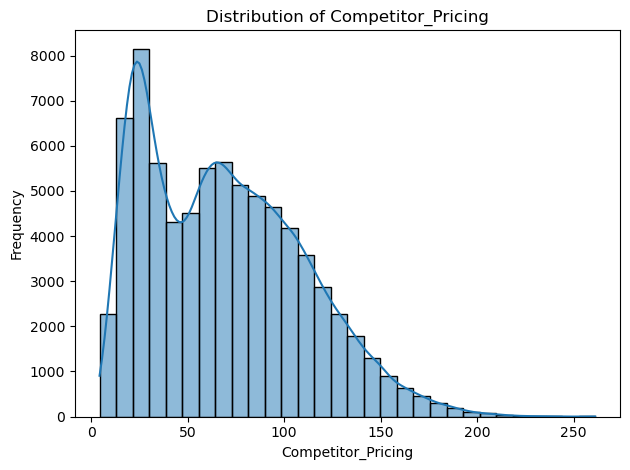

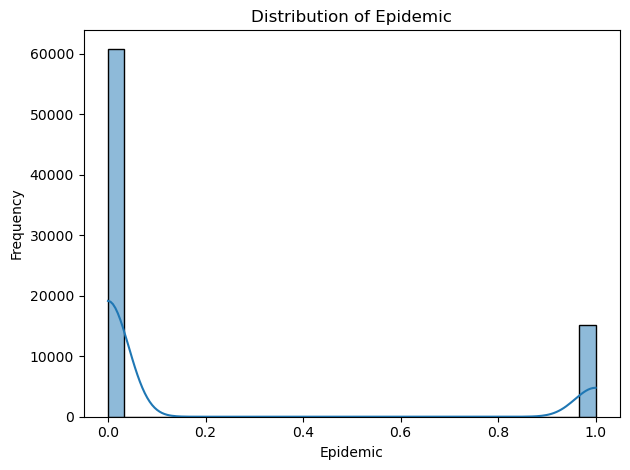

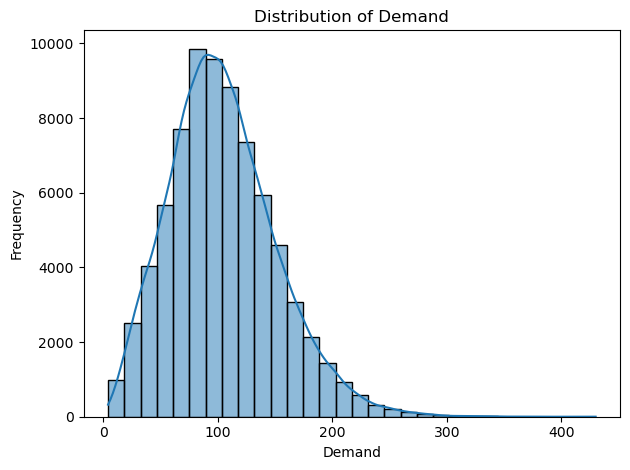

In [35]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde= True, bins = 30 )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

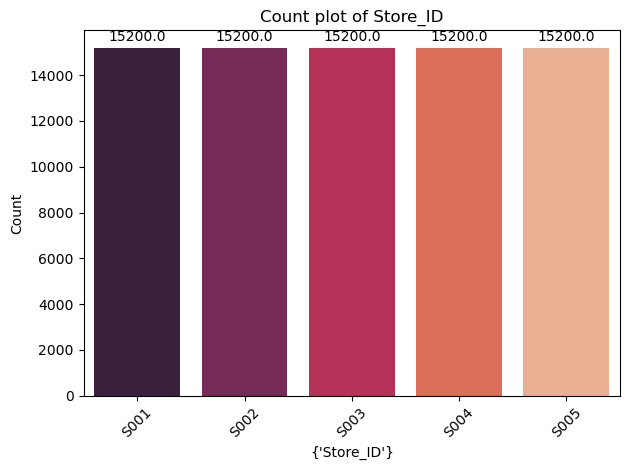

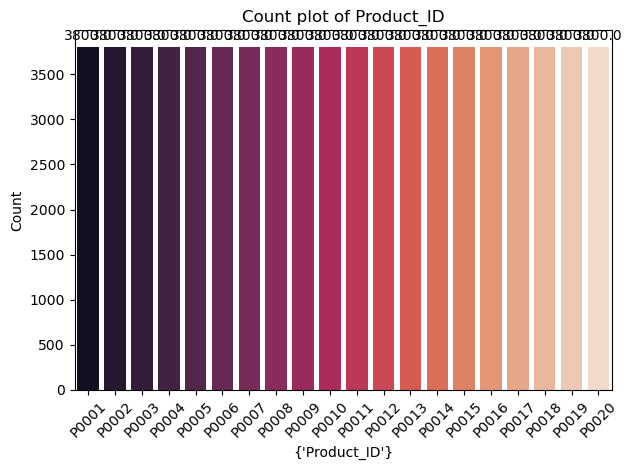

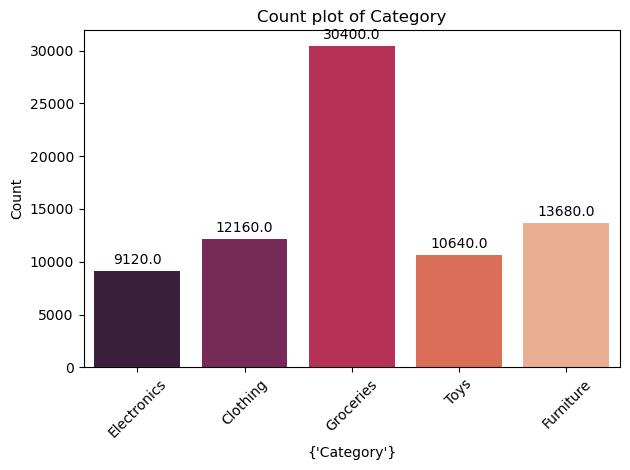

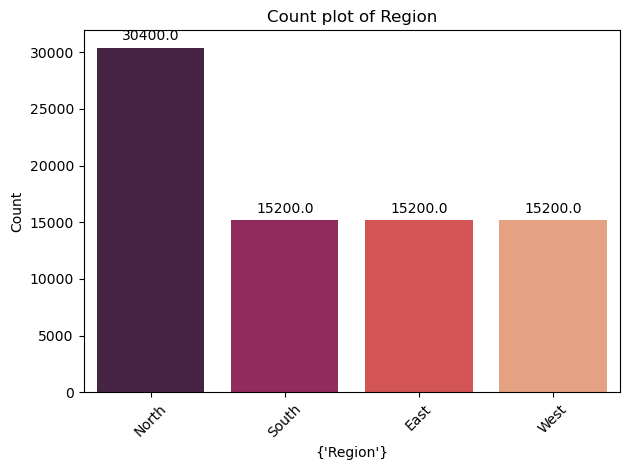

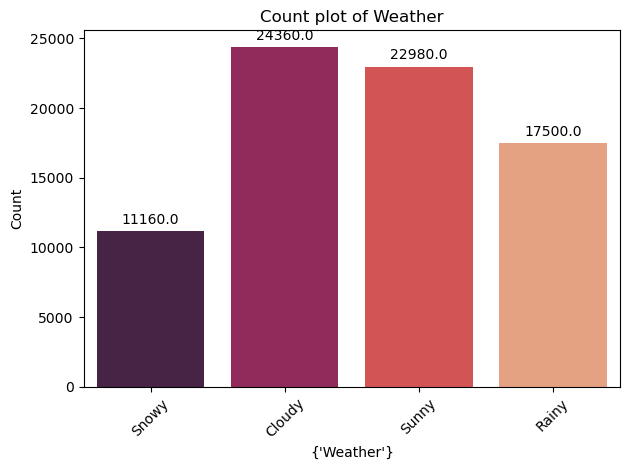

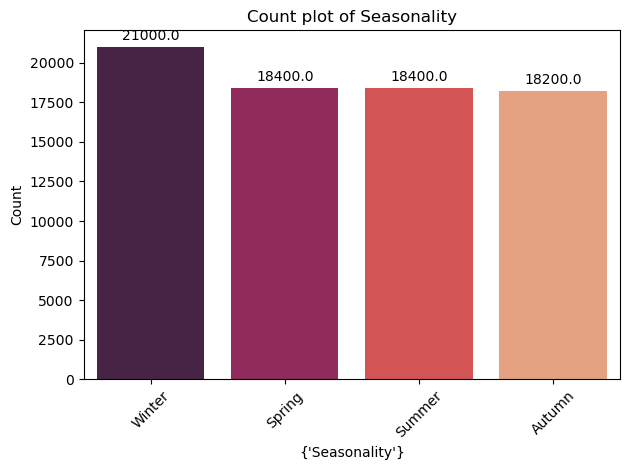

In [36]:
for col_2 in categoricals_cols:
    ax = sns.countplot(data = df, x = col_2, palette = 'rocket')
    plt.title(f'Count plot of {col_2}')
    plt.xlabel({col_2})
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    
     # Add data value on each bar
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10, color='black', 
            xytext=(0, 3), 
            textcoords='offset points'
        )
    plt.show()

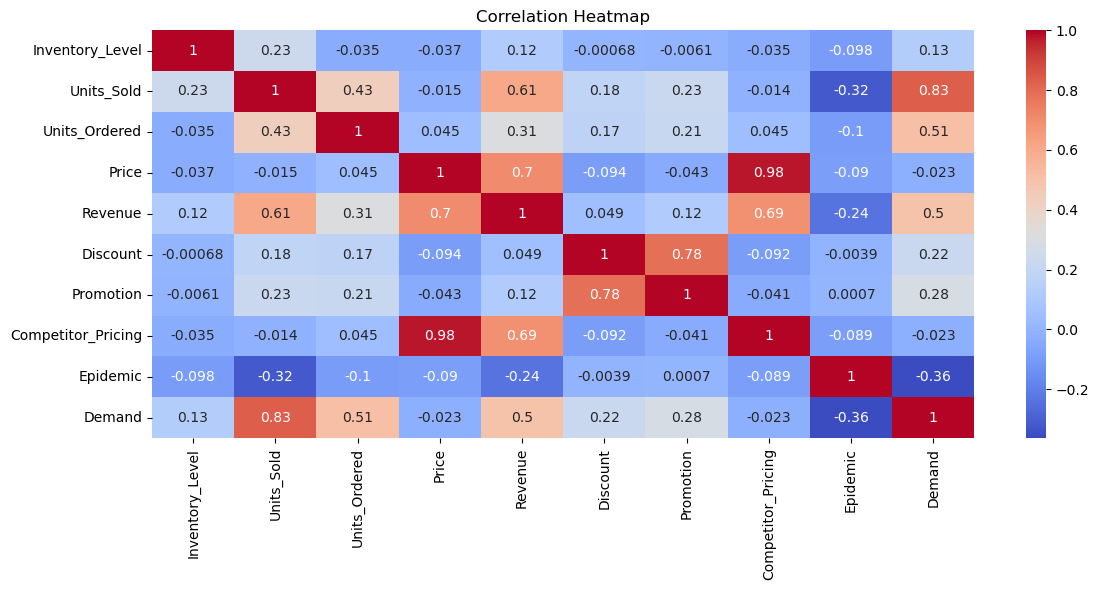

In [37]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(numeric_only= True), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

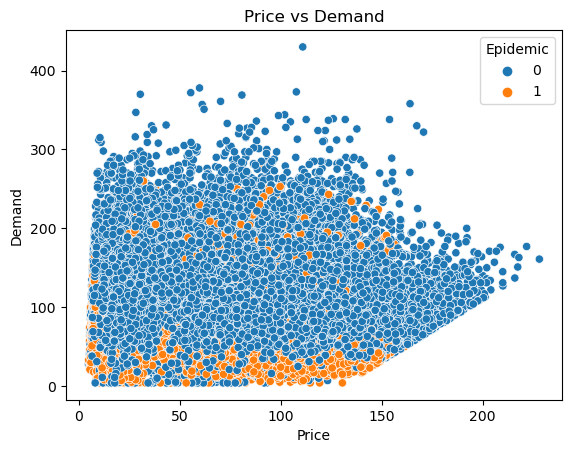

In [38]:
sns.scatterplot(x = 'Price', y='Demand', data = df, hue = 'Epidemic')
plt.title("Price vs Demand")
plt.show()

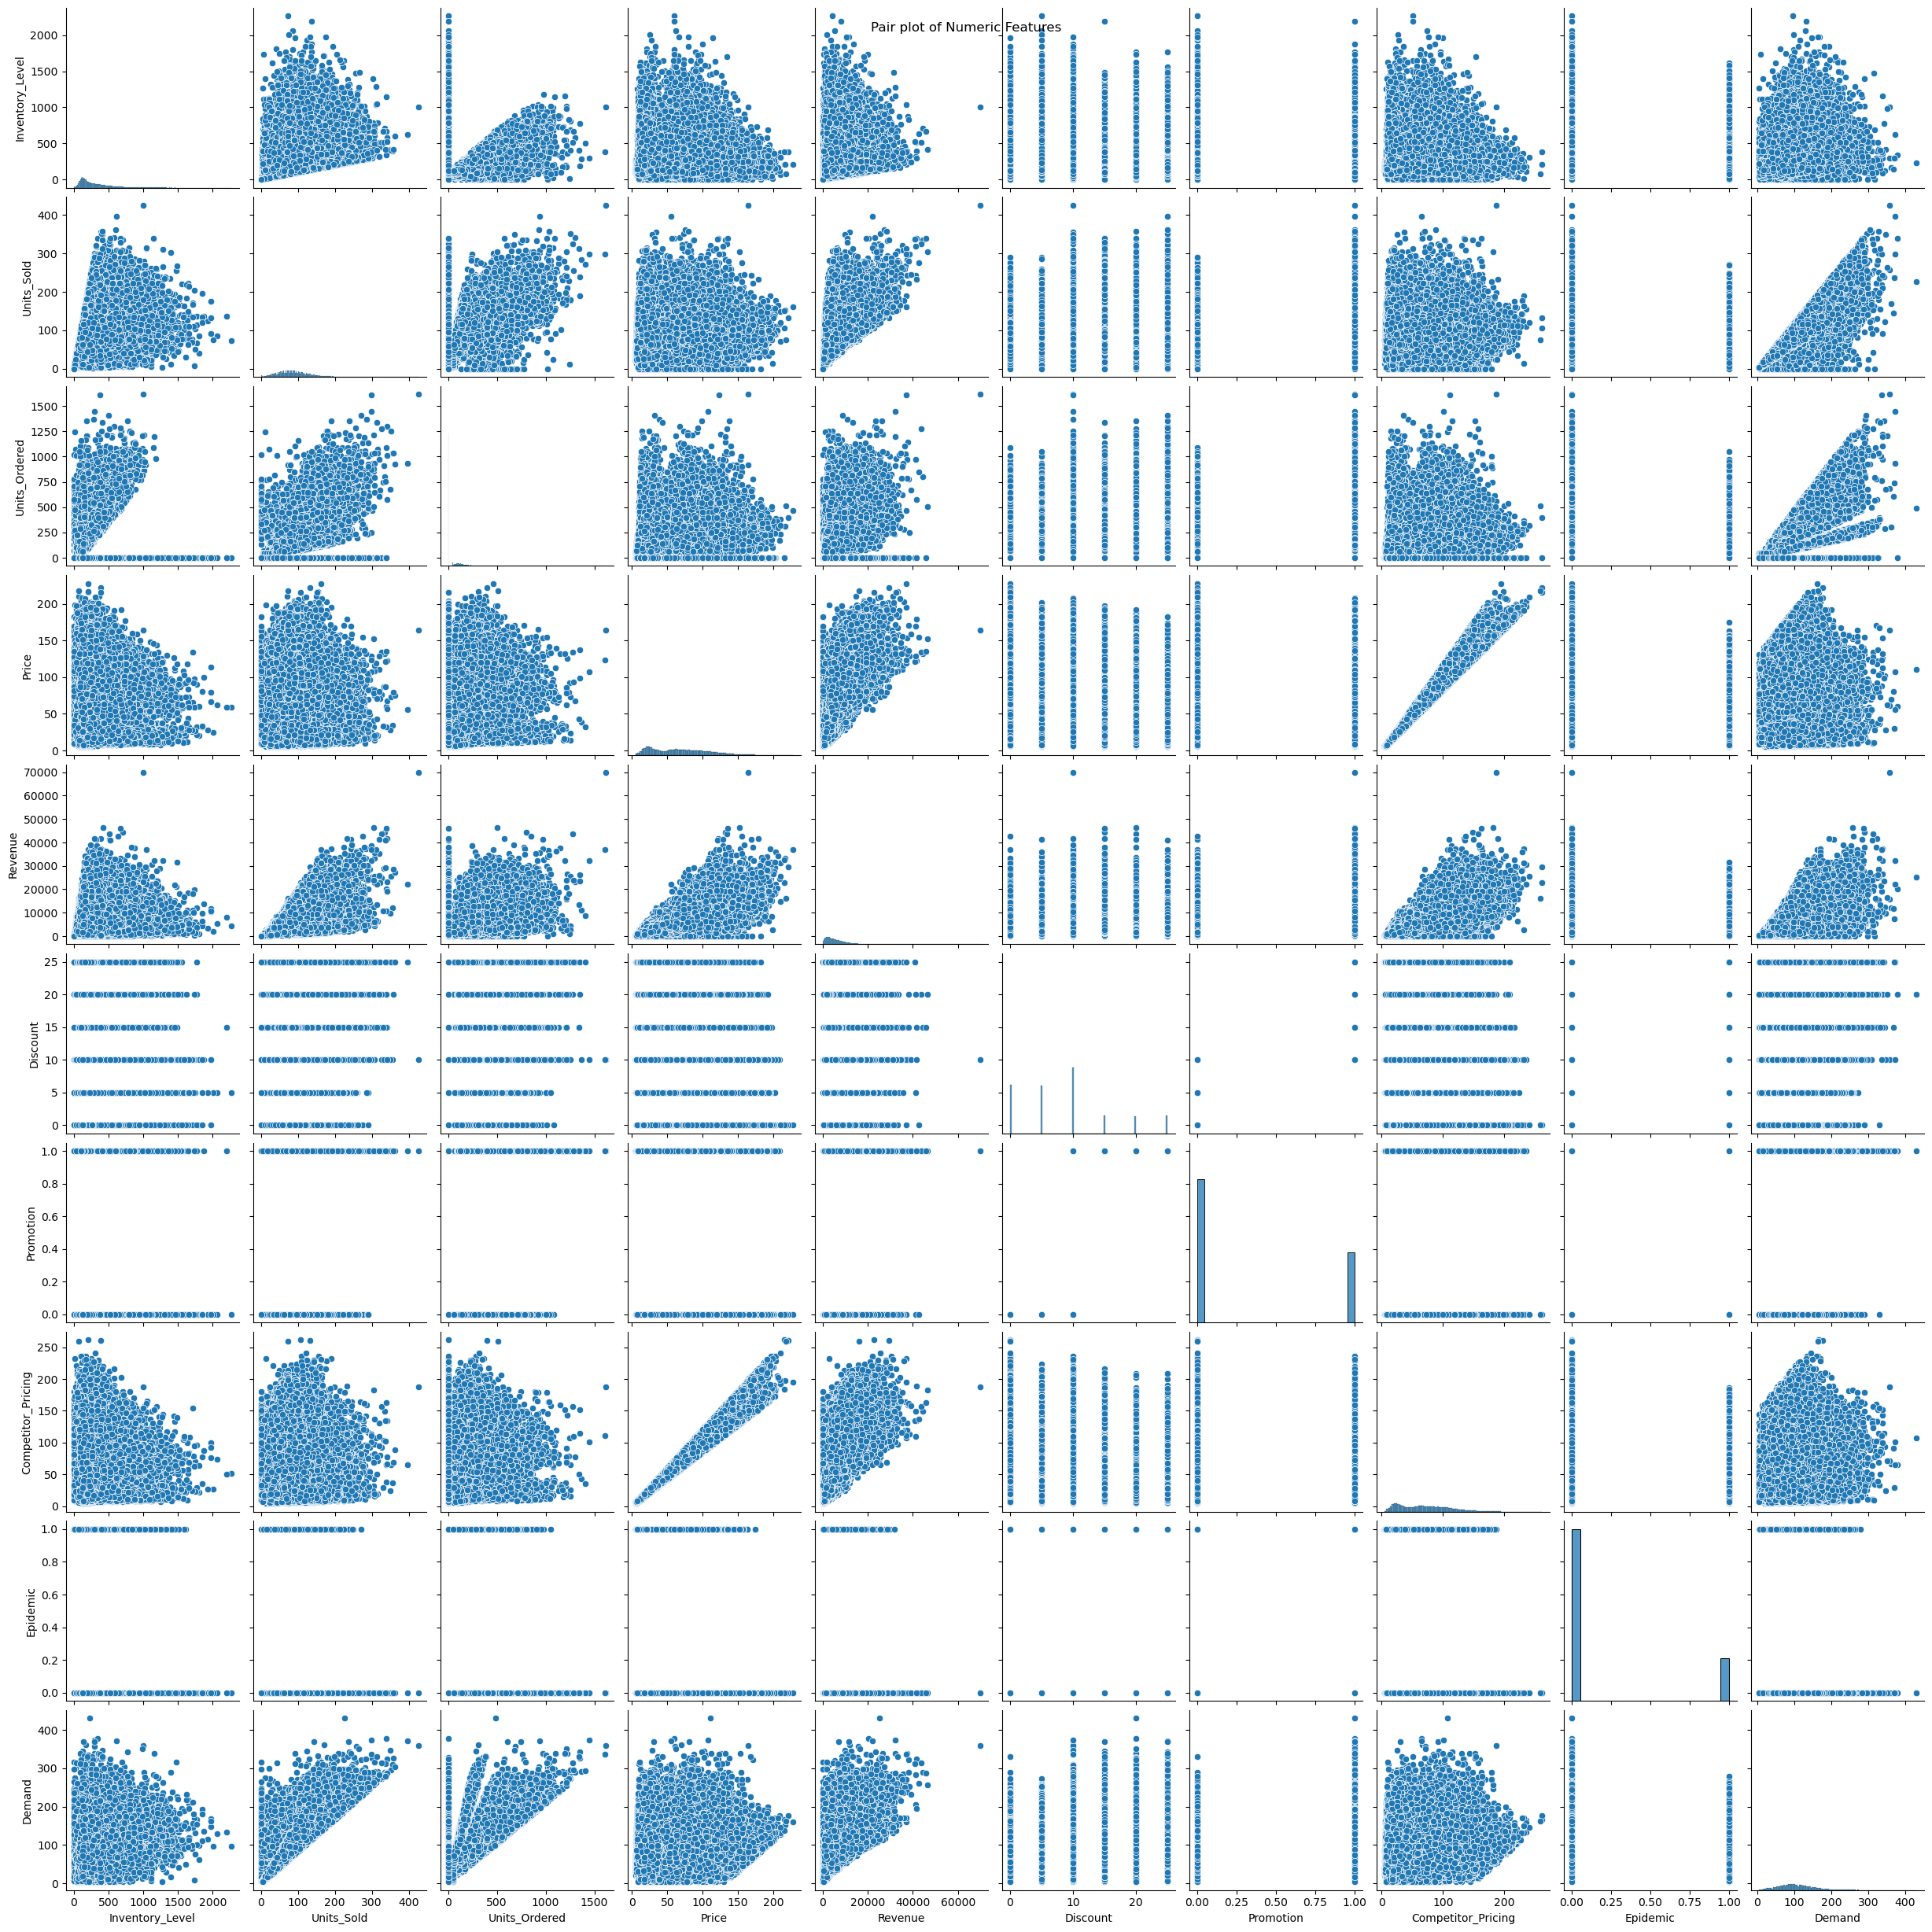

In [39]:
# Pair plot for numeric features

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair plot of Numeric Features')
plt.show()

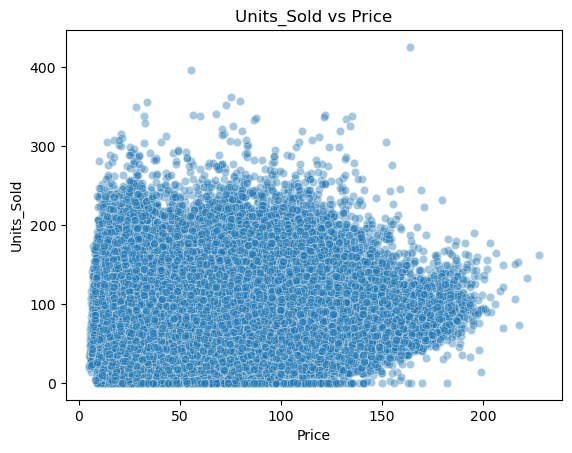

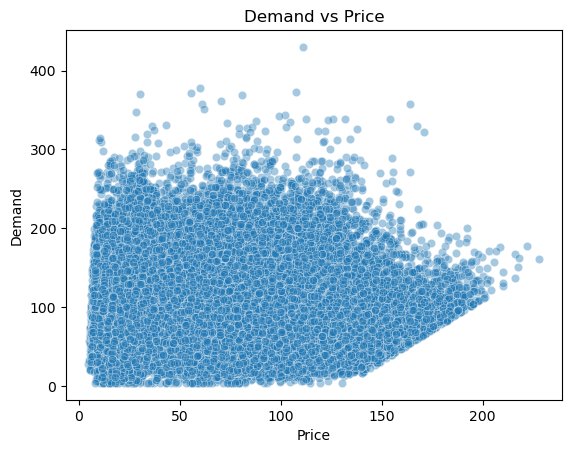

In [60]:
for target in ['Units_Sold', 'Demand']:
    sns.scatterplot(x='Price', y=target, data=df, alpha=0.4)
    plt.title(f"{target} vs Price")
    plt.show()

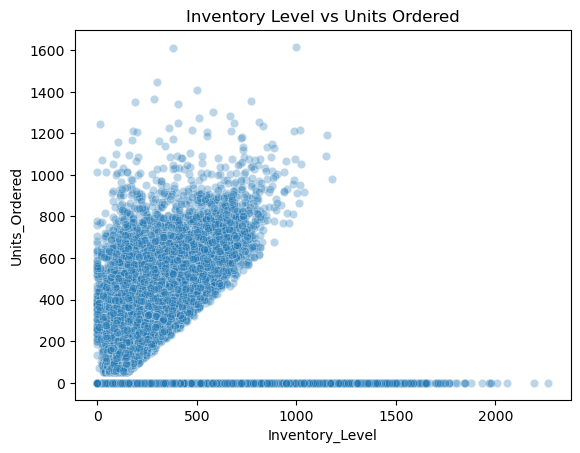

In [62]:
sns.scatterplot(x='Inventory_Level', y='Units_Ordered', data=df, alpha=0.3)
plt.title("Inventory Level vs Units Ordered")
plt.show()

##### Time-Series Analysis

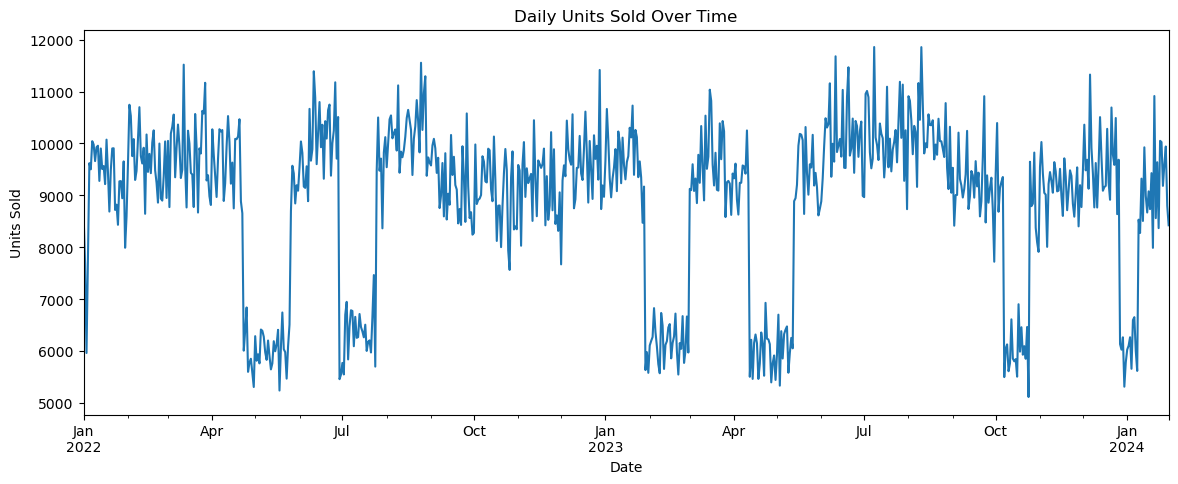

In [40]:
daily_units = df.groupby('Date')['Units_Sold'].sum()
daily_units.plot(figsize = (14,5), title = "Daily Units Sold Over Time")
plt.ylabel("Units Sold")
plt.show()

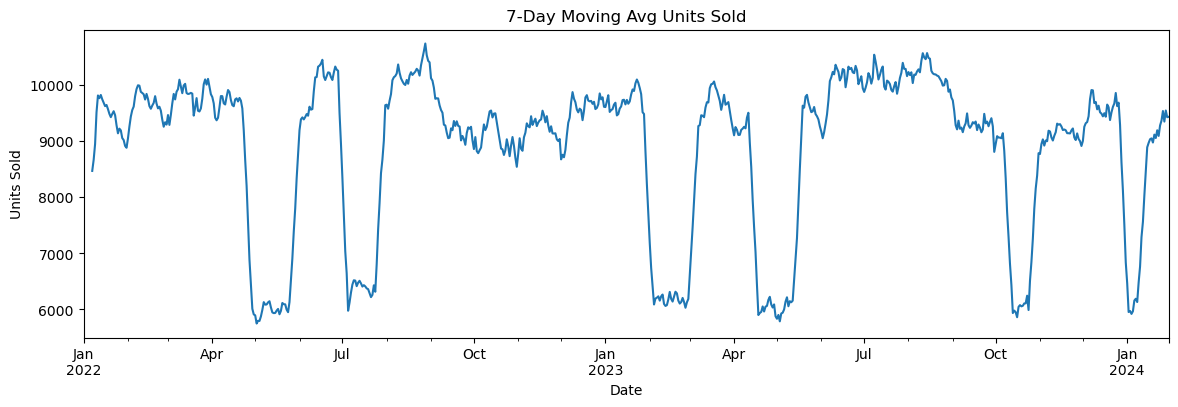

In [44]:
df.groupby('Date')['Units_Sold'].sum().rolling(window=7).mean().plot(figsize=(14, 4), title="7-Day Moving Avg Units Sold")
plt.ylabel("Units Sold")
plt.show()

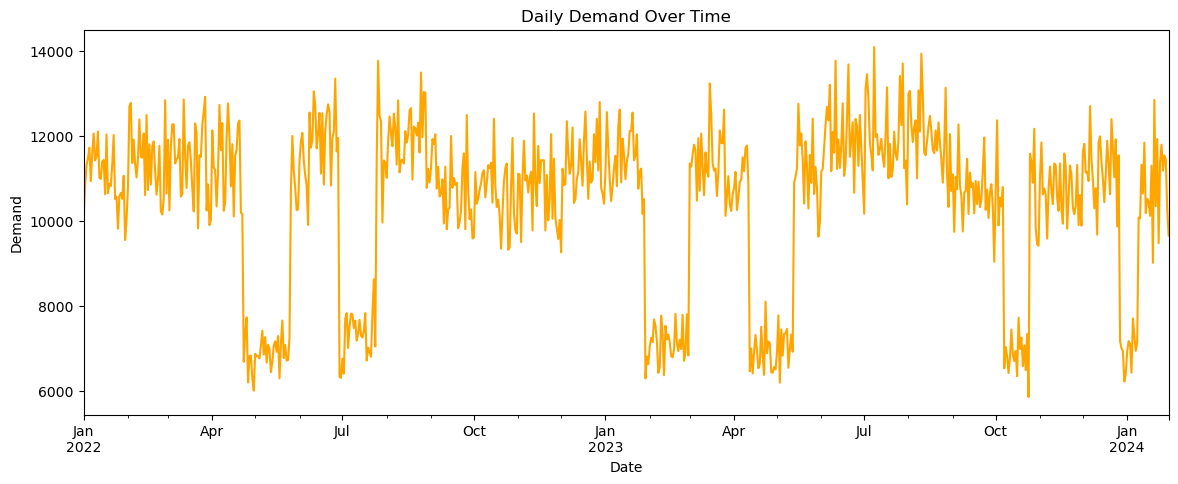

In [41]:
daily_units = df.groupby('Date')['Demand'].sum()
daily_units.plot(figsize = (14,5), title = "Daily Demand Over Time", color = 'Orange')
plt.ylabel("Demand")
plt.show()

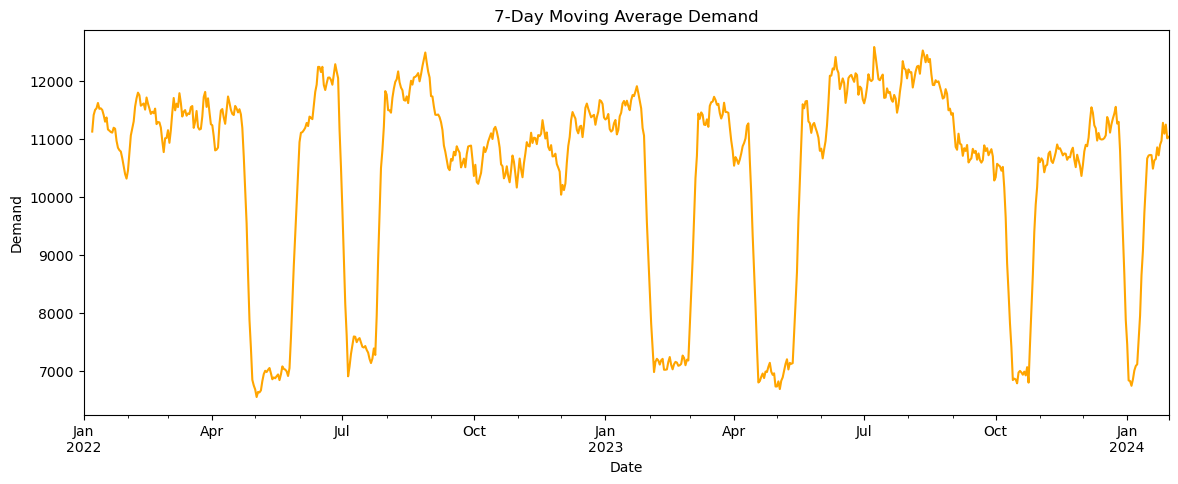

In [45]:
df_daily = df.groupby('Date')['Demand'].sum().rolling(window = 7).mean()
df_daily.plot(figsize = (14,5), title = "7-Day Moving Average Demand", color='Orange')
plt.ylabel("Demand")
plt.show()

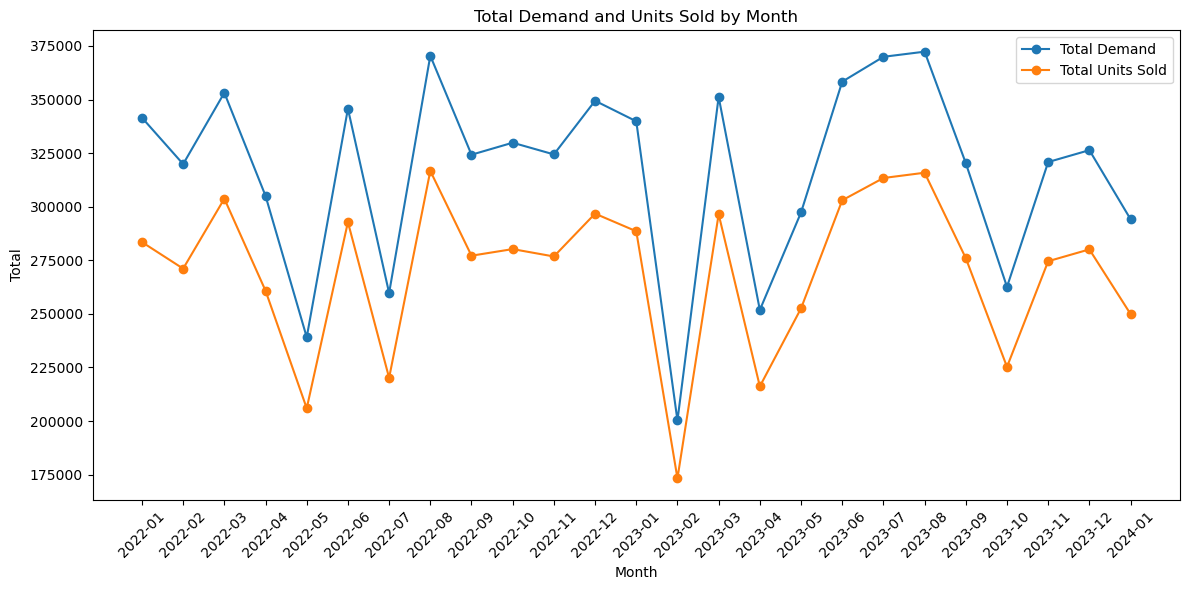

In [46]:
df['sales_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_summary = df.groupby('sales_month').agg({
    'Demand': 'sum',
    'Units_Sold': 'sum'
}).reset_index()



plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['sales_month'].astype(str), monthly_summary['Demand'], marker='o', label='Total Demand')
plt.plot(monthly_summary['sales_month'].astype(str), monthly_summary['Units_Sold'], marker='o', label='Total Units Sold')
plt.title('Total Demand and Units Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<b> Regional Distribution </b>

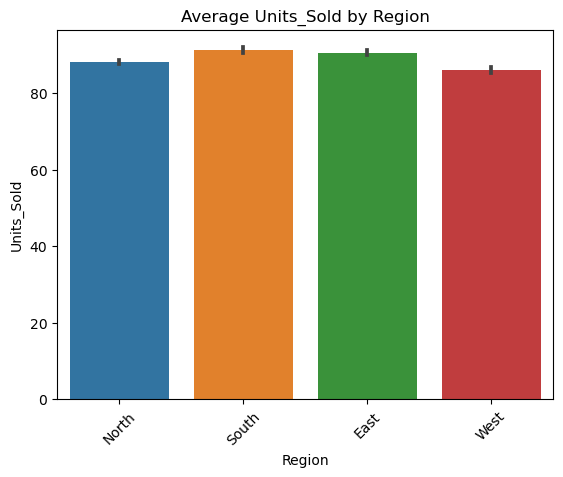

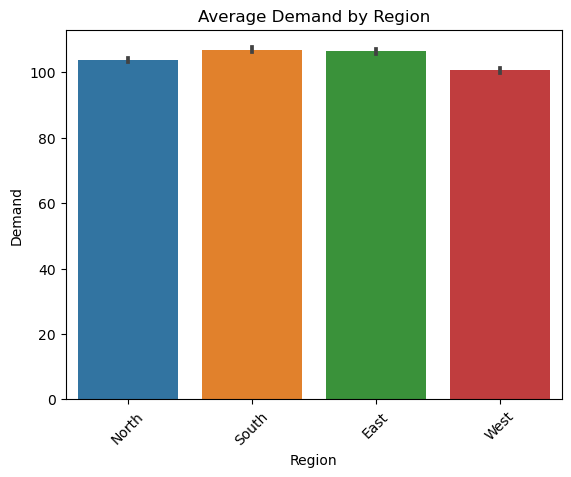

In [48]:
for target in ['Units_Sold','Demand']:
    sns.barplot(x='Region', y = target, data = df, estimator = 'mean')
    plt.title(f"Average {target} by Region")
    plt.xticks(rotation = 45)
    plt.show()

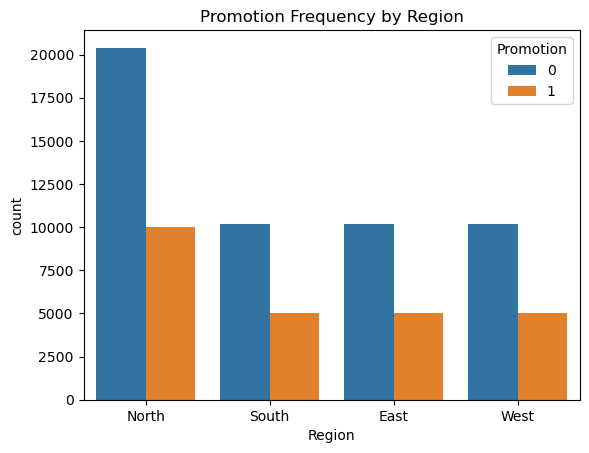

In [49]:
sns.countplot(x='Region', hue='Promotion', data = df)
plt.title('Promotion Frequency by Region')
plt.show()

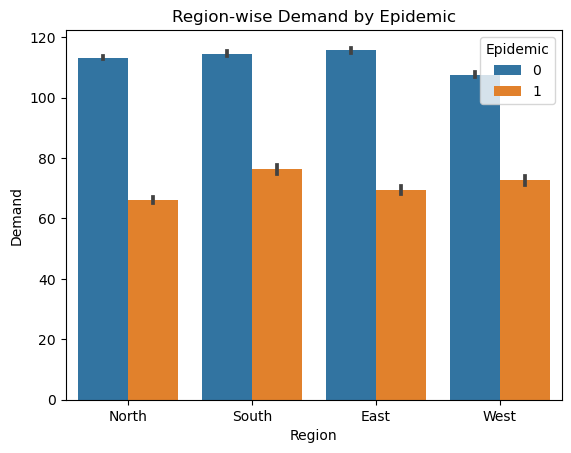

In [50]:
sns.barplot(x='Region', y='Demand', hue='Epidemic', data=df)
plt.title("Region-wise Demand by Epidemic")
plt.show()

##### Seasonality Impact on Demand and Sales

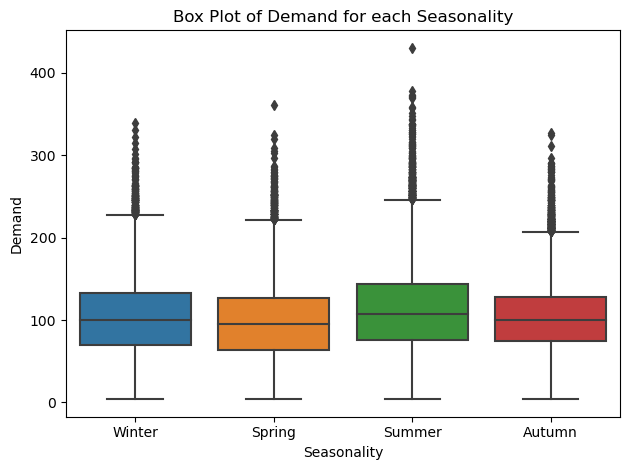

In [52]:
# Box plot to inspect distribution by Seasonality
plt.figure()
sns.boxplot(x='Seasonality', y = 'Demand', data = df)
plt.title('Box Plot of Demand for each Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

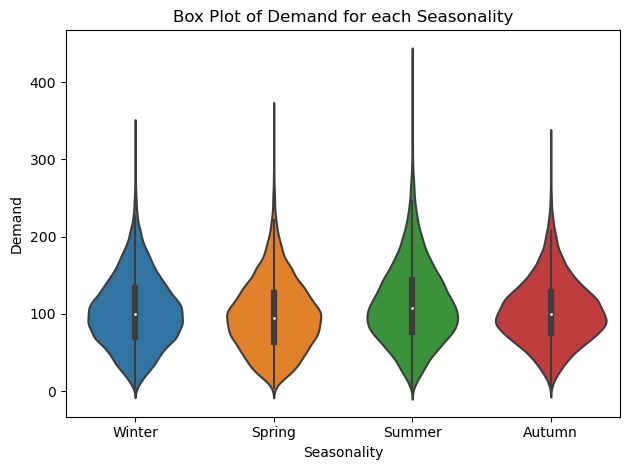

In [53]:
# Box plot to inspect distribution by Seasonality
plt.figure()
sns.violinplot(x='Seasonality', y = 'Demand', data = df)
plt.title('Box Plot of Demand for each Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

<b> Effect of Epidemic </b>

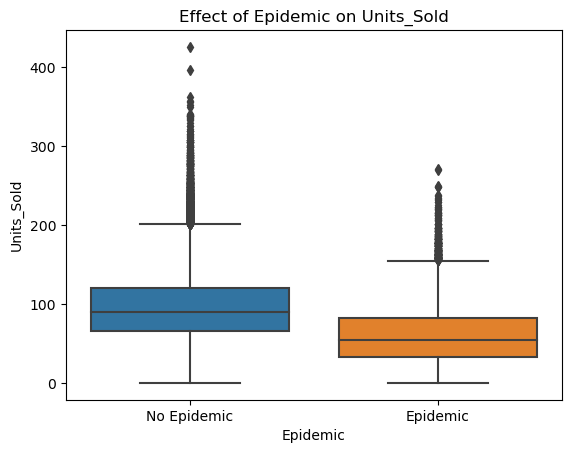

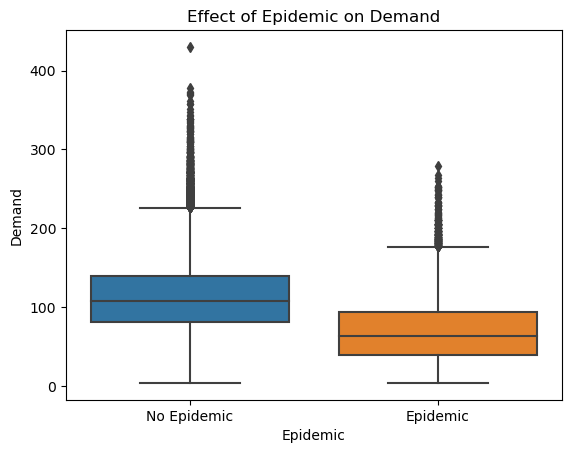

In [101]:
for target in ['Units_Sold','Demand']:
    sns.boxplot(x='Epidemic', y= target, data = df)
    plt.title(f"Effect of Epidemic on {target}")
    plt.xticks([0,1],['No Epidemic', 'Epidemic'])
    plt.show()

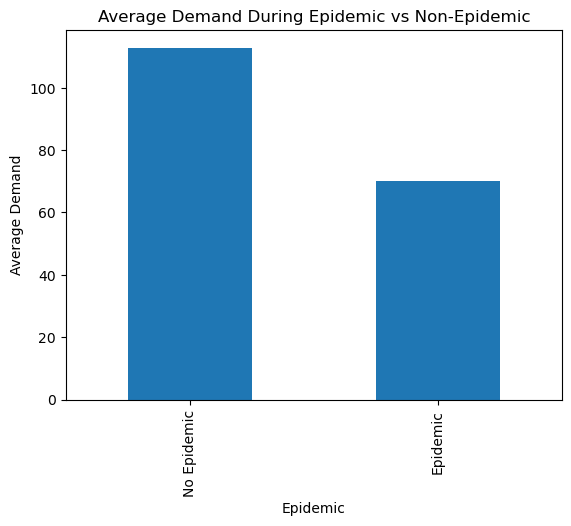

In [57]:
df.groupby('Epidemic')['Demand'].mean().plot(kind='bar')
plt.title("Average Demand During Epidemic vs Non-Epidemic")
plt.xticks([0, 1], ['No Epidemic', 'Epidemic'])
plt.ylabel("Average Demand")
plt.show()

<b> Price Distribution </b>


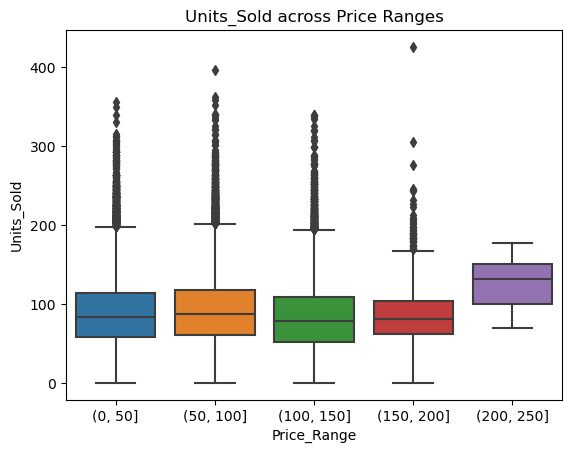

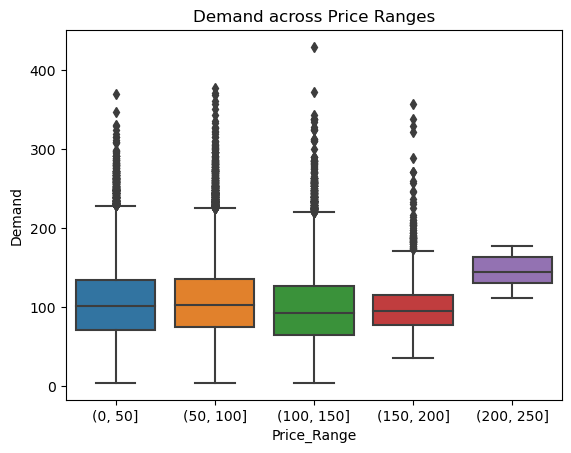

In [56]:
df['Price_Range'] = pd.cut(df['Price'], bins = [0,50,100,150,200,250])

for target in ['Units_Sold','Demand']:
    sns.boxplot(x='Price_Range', y =target, data = df)
    plt.title(f"{target} across Price Ranges")
    plt.show()

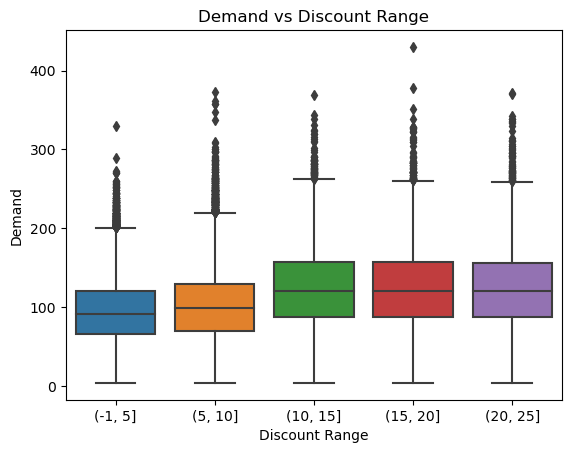

In [58]:
df['Discount Range'] = pd.cut(df['Discount'], bins=[-1, 5, 10, 15, 20, 25])
sns.boxplot(x='Discount Range', y='Demand', data=df)
plt.title("Demand vs Discount Range")
plt.show()

## Demand Prediction


Forecasting demand is crucial in retail; overstocking or understocking has direct implications on revenue. We will create a predictor for Demand using a Random Forest Regressor. We extract a subset of numeric features, split the data into training and testing sets, and evaluate the model using the R² score. Additionally, we illustrate the feature importances via a horizontal bar plot. While this is only one approach, it can be a baseline for further model improvements.

In [67]:
df.head()

Date Store_ID Product_ID     Category Region  Inventory_Level  \
0 2022-01-01     S001      P0001  Electronics  North              195   
1 2022-01-01     S001      P0002     Clothing  North              117   
2 2022-01-01     S001      P0003     Clothing  North              247   
3 2022-01-01     S001      P0004  Electronics  North              139   
4 2022-01-01     S001      P0005    Groceries  North              152   

   Units_Sold  Units_Ordered  Price  Revenue  Discount Weather  Promotion  \
0         102            252  72.72  7417.44         5   Snowy          0   
1         117            249  80.16  9378.72        15   Snowy          1   
2         114            612  62.94  7175.16        10   Snowy          1   
3          45            102  87.63  3943.35        10   Snowy          0   
4          65            271  54.41  3536.65         0   Snowy          0   

   Competitor_Pricing Seasonality  Epidemic  Demand sales_month Price_Range  \
0               85.73      Winter         0     115     2022-01   (50, 100]   
1               92.02      Winter         0     229     2022-01   (50, 100]   
2               60.08      Winter         0     157     2022-01   (50, 100]   
3               85.19      Winter         0      52     2022-01   (50, 100]   
4               51.63      Winter         0      59     2022-01   (50, 100]   

  Discount Range  
0        (-1, 5]  
1       (10, 15]  
2        (5, 10]  
3        (5, 10]  
4        (-1, 5]

In [68]:
feature_cols = ['Inventory_Level','Units_Sold','Units_Ordered','Price','Discount','Promotion','Competitor_Pricing','Epidemic']

X = df[feature_cols]
y= df['Demand']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

<b> Random Forest Regressor </b>

In [71]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model

RandomForestRegressor(random_state=42)

In [74]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions) 

print(f'R2 score of the model: {r2:.4f}')
print(f'Mean Squared Error of the model: {mse:.4f}')

R2 score of the model: 0.8412
Mean Squared Error of the model: 349.8715


In [100]:
imp = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

importance
Units_Sold            0.724931
Units_Ordered         0.089583
Inventory_Level       0.089562
Price                 0.037481
Competitor_Pricing    0.035036
Discount              0.011480
Epidemic              0.006554
Promotion             0.005374

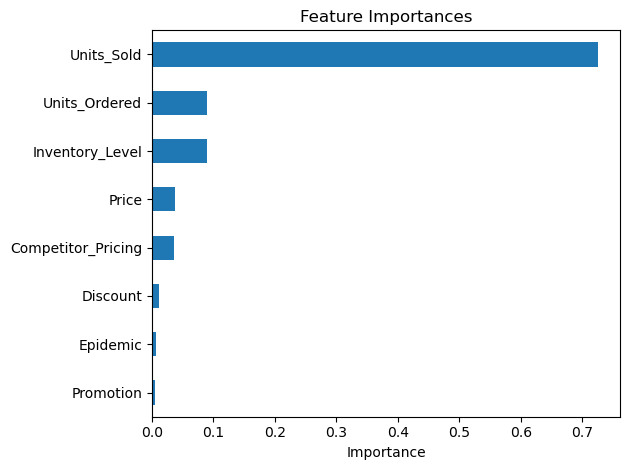

In [77]:
# Feature Importance Visualization
importances = model.feature_importances_
features = pd.Series(importances, index= feature_cols).sort_values()

plt.figure()
features.plot(kind = 'barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

<b> Experimenting additional models </b>

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [82]:
regressor = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Extra Tree Regressor": ExtraTreesRegressor(),
    "XGB Regressor": XGBRegressor()
}

for name, reg in regressor.items():
    print(f"----------{name}-----------")
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
    print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")
    

----------Linear Regression-----------

 Mean Squared Error of the model: 556.1474088660833

 R2 score of the model: 0.7475468555021632
----------Decision Tree Regressor-----------

 Mean Squared Error of the model: 664.4046052631579

 R2 score of the model: 0.6984054422558377
----------Extra Tree Regressor-----------

 Mean Squared Error of the model: 372.03124254385966

 R2 score of the model: 0.831123087990058
----------XGB Regressor-----------

 Mean Squared Error of the model: 342.828317556751

 R2 score of the model: 0.8443792321777319


### XGB Regressor

In [97]:
# Exploring XGB Regressor

xgb1 = XGBRegressor(n_estimators = 100, max_depth = 10, learning_rate = 0.05)

xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)

print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")


 Mean Squared Error of the model: 336.0478149623999

 R2 score of the model: 0.847457119755613


In [96]:
# Exploring XGB Regressor

xgb2 = XGBRegressor(n_estimators = 100, random_state = 3, learning_rate = 0.05, max_depth = 2)

xgb2.fit(X_train, y_train)
y_pred = xgb2.predict(X_test)

print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")


 Mean Squared Error of the model: 434.8029096614934

 R2 score of the model: 0.8026290152018237


In [98]:
imp = pd.DataFrame(xgb1.feature_importances_, index = X.columns, columns = ['importance'])
imp.sort_values(by='importance', ascending = False)

importance
Units_Sold            0.773679
Units_Ordered         0.071636
Inventory_Level       0.045828
Promotion             0.038911
Epidemic              0.038534
Competitor_Pricing    0.011756
Price                 0.011254
Discount              0.008402

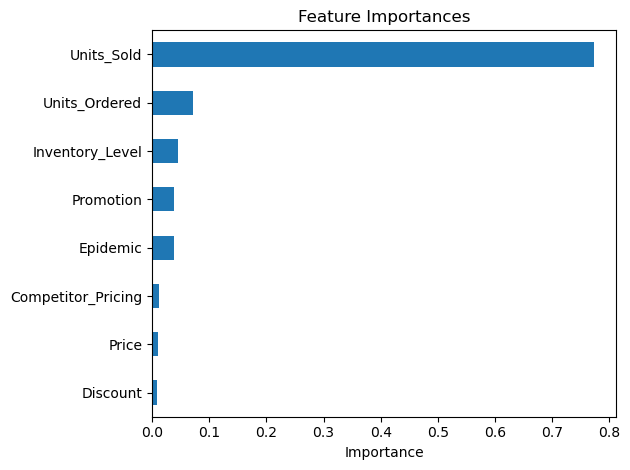

In [99]:
# Feature Importance Visualization
importances = xgb1.feature_importances_
features = pd.Series(importances, index= feature_cols).sort_values()

plt.figure()
features.plot(kind = 'barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Extra Trees Regressor

In [87]:

xtr1 = ExtraTreesRegressor(n_estimators = 100, max_depth =10, oob_score = False, random_state = 42)

xtr1.fit(X_train, y_train)

y_pred = xtr1.predict(X_test)


print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")


 Mean Squared Error of the model: 390.1846289814638

 R2 score of the model: 0.8228826837080324


In [88]:
xtr2 = ExtraTreesRegressor(random_state = 42, n_estimators = 100)

xtr2.fit(X_train, y_train)

y_pred = xtr2.predict(X_test)


print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")


 Mean Squared Error of the model: 371.836634868421

 R2 score of the model: 0.8312114266549959


In [94]:
xtr3 = ExtraTreesRegressor(n_estimators = 100, random_state = 42, max_depth = 15, min_samples_split = 100, oob_score = True, bootstrap=True)

xtr3.fit(X_train, y_train)

y_pred = xtr3.predict(X_test)


print(f"\n Mean Squared Error of the model: {mean_squared_error(y_test, y_pred)}")
print(f"\n R2 score of the model: {r2_score(y_test, y_pred)}")


 Mean Squared Error of the model: 370.0110050248174

 R2 score of the model: 0.8320401385888454


## Conclusion

The notebook provided a comprehensive analysis, starting from data cleaning and exploratory visualizations to building a prediction model for demand. Random Forest and XGB Regressor model offered a baseline prediction with an R2 score of around <b>85%</b>, and helped identify key features that impact demand.